Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [81]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [82]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Melanoma_assignment/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Melanoma_assignment/Test')
# data_dir_train = pathlib.Path("Train")
# data_dir_test = pathlib.Path('Test')

In [83]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [84]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [85]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds, val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=batch_size, image_size=(img_width, img_height), seed=123, validation_split=0.2, subset='both', label_mode='categorical')  ##todo

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Using 1347 files for validation.


In [86]:
## Write your Test dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test, batch_size=batch_size, image_size=(img_width, img_height), seed=123, label_mode='categorical')  ##todo

Found 118 files belonging to 9 classes.


In [87]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

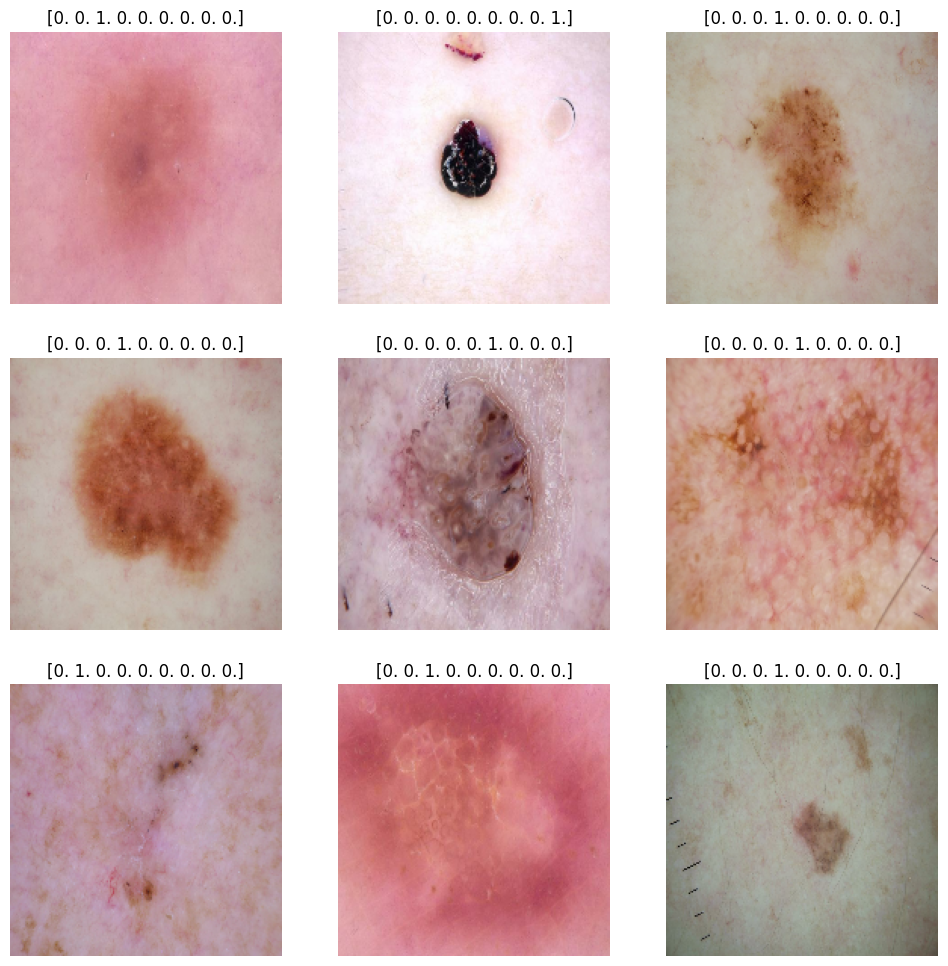

In [88]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
# print(type(train_ds),dir(train_ds))
# for x,y in train_ds:
#   for i in range(batch_size):
#     print(y[i], type(y[i]))
#     plt.xlabel(class_names[y[i].numpy()])
#     plt.imshow(tf.cast(x[i], 'int16'))
#     plt.show()
#   break
plt.figure(figsize=(12, 12))
for batch_images, batch_labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(batch_images[i].numpy().astype("uint8"))
        plt.title(str(batch_labels[i].numpy()))
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [89]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [90]:
### Your code goes here
'''input_dim = (img_width, img_height, 3)
inp = layers.Input(input_dim)
inp = layers.experimental.preprocessing.Rescaling(1.0/255, 0)(inp)
x=tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None), bias_initializer='zeros')(inp)
# x = tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D()(x)
x=tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None), bias_initializer='zeros')(x)
# x = tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D()(x)
x=tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None), bias_initializer='zeros')(x)
# x = tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D()(x)
x=tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None), bias_initializer='zeros')(x)
# x = tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D()(x)
x=tf.keras.layers.Flatten()(x)
out = tf.keras.layers.Dense(9, activation='softmax', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None), bias_initializer='zeros')(x)
model = keras.Model(inp, out)'''
model = keras.Sequential(
    [
        keras.Input(shape=(img_width, img_height, 3)),
        layers.Rescaling(1.0 / 255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(9, activation="softmax"),
    ]
)

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [91]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [92]:
# View the summary of all layers
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 118336)          

### Train the model

In [93]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose=True
)

Epoch 1/20
169/169 [==============================] - 213s 1s/step - loss: 1.9373 - accuracy: 0.3155 - val_loss: 1.6499 - val_accuracy: 0.3563
Epoch 2/20
169/169 [==============================] - 193s 1s/step - loss: 1.4026 - accuracy: 0.4666 - val_loss: 1.3735 - val_accuracy: 0.4677
Epoch 3/20
169/169 [==============================] - 185s 1s/step - loss: 1.1838 - accuracy: 0.5784 - val_loss: 1.1256 - val_accuracy: 0.6036
Epoch 4/20
169/169 [==============================] - 179s 1s/step - loss: 0.9193 - accuracy: 0.6767 - val_loss: 1.0028 - val_accuracy: 0.6592
Epoch 5/20
169/169 [==============================] - 263s 2s/step - loss: 0.7153 - accuracy: 0.7602 - val_loss: 0.9091 - val_accuracy: 0.7112
Epoch 6/20
169/169 [==============================] - 192s 1s/step - loss: 0.5568 - accuracy: 0.8147 - val_loss: 0.9152 - val_accuracy: 0.7194
Epoch 7/20
169/169 [==============================] - 202s 1s/step - loss: 0.4681 - accuracy: 0.8461 - val_loss: 0.9013 - val_accuracy: 0.7157

### Visualizing training results

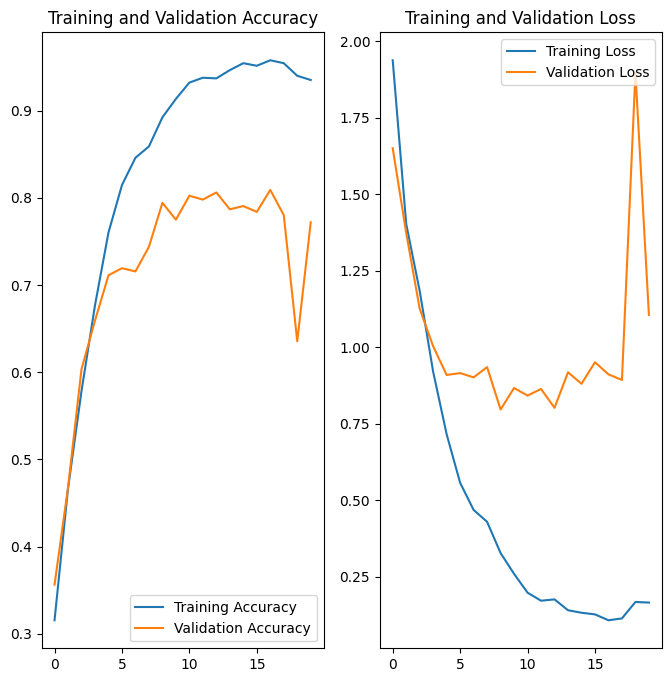

In [94]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit
- Yes there is overfitting in the model as the difference between train accuracy and val accuracy is more than 10%. We will employ some techniques such as dropout to reduce overfitting
- The model stability is also low as there is sudden drop in validation accuracy towards the end

### Write your findings here

In [95]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
# Apply `data_augmentation` to the training images.
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
    ]
)
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

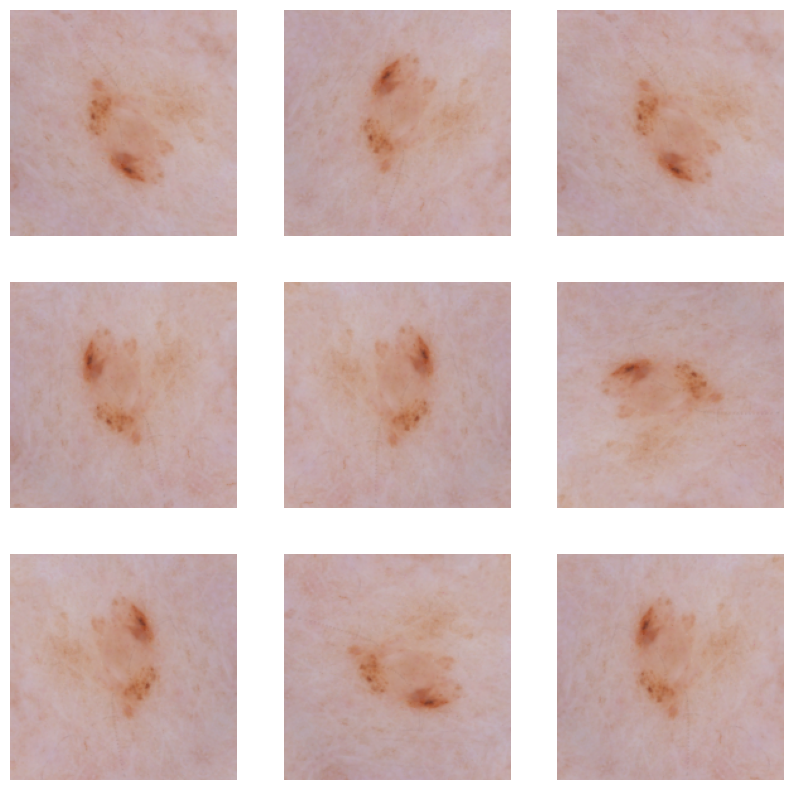

In [96]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [97]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
'''input_dim = (img_width, img_height, 3)
inp = layers.Input(input_dim)
inp = layers.experimental.preprocessing.Rescaling(1.0/255, 0)(inp)
# x = tf.keras.layers.Dropout(0.1)
x=tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None), bias_initializer='zeros')(inp)
# x = tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D()(x)
# x = tf.keras.layers.Dropout(0.1)(x)
x=tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None), bias_initializer='zeros')(x)
# x = tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D()(x)
# x = tf.keras.layers.Dropout(0.1)(x)
x=tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None), bias_initializer='zeros')(x)
# x = tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D()(x)
# x = tf.keras.layers.Dropout(0.1)(x)
x=tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None), bias_initializer='zeros')(x)
# x = tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D()(x)
# x = tf.keras.layers.Dropout(0.1)(x)
x=tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.15)(x)
out = tf.keras.layers.Dense(9, activation='softmax', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None), bias_initializer='zeros')(x)
model = keras.Model(inp, out)'''
model = keras.Sequential(
    [
        keras.Input(shape=(img_width, img_height, 3)),
        layers.Rescaling(1.0 / 255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(9, activation="softmax"),
    ]
)

### Compiling the model

In [98]:
## Your code goes here
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 118336)          

### Training the model

In [99]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)  ## your training code

Epoch 1/20
169/169 [==============================] - 227s 1s/step - loss: 2.1166 - accuracy: 0.2459 - val_loss: 1.6491 - val_accuracy: 0.3756
Epoch 2/20
169/169 [==============================] - 211s 1s/step - loss: 1.6334 - accuracy: 0.3769 - val_loss: 1.5928 - val_accuracy: 0.3705
Epoch 3/20
169/169 [==============================] - 192s 1s/step - loss: 1.5444 - accuracy: 0.4028 - val_loss: 1.5046 - val_accuracy: 0.4209
Epoch 4/20
169/169 [==============================] - 210s 1s/step - loss: 1.4560 - accuracy: 0.4355 - val_loss: 1.3929 - val_accuracy: 0.4610
Epoch 5/20
169/169 [==============================] - 205s 1s/step - loss: 1.3860 - accuracy: 0.4627 - val_loss: 1.3830 - val_accuracy: 0.4662
Epoch 6/20
169/169 [==============================] - 209s 1s/step - loss: 1.3597 - accuracy: 0.4811 - val_loss: 1.3235 - val_accuracy: 0.4848
Epoch 7/20
169/169 [==============================] - 200s 1s/step - loss: 1.2970 - accuracy: 0.5024 - val_loss: 1.3284 - val_accuracy: 0.4796

### Visualizing the results

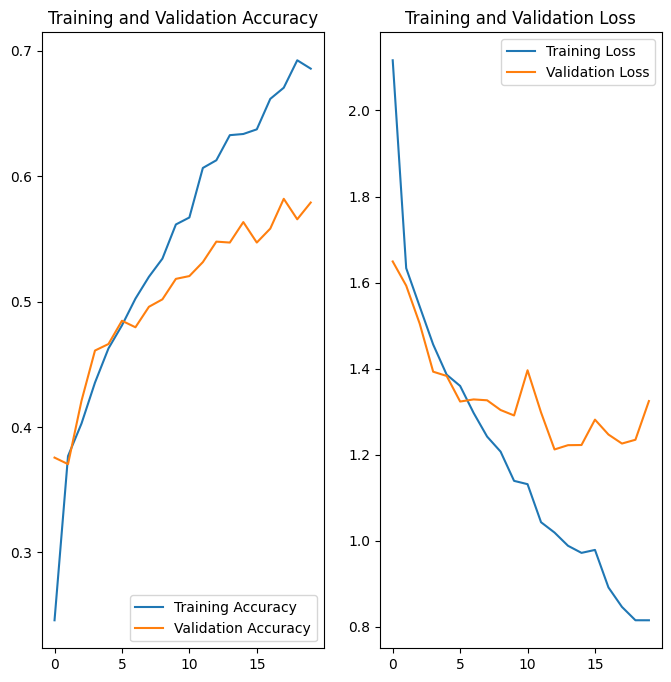

In [100]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
- The model is still overfitting but the degree of overfit has reduced compared to before. 
- The model accuracy in general has gone down. But the trend is still increasing and thus with more number of epochs the accuracy will imrove
- The dropout rate can be increased to 0.3 to 0.5 to reduce the overfitting problem

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [101]:
## Your code goes here.
for i in os.listdir(data_dir_train):
  print(f'Data samples in class {i}', len(os.listdir(os.path.join(data_dir_train, i))))

Data samples in class actinic keratosis 115
Data samples in class basal cell carcinoma 377
Data samples in class dermatofibroma 96
Data samples in class melanoma 439
Data samples in class nevus 358
Data samples in class pigmented benign keratosis 463
Data samples in class seborrheic keratosis 78
Data samples in class squamous cell carcinoma 182
Data samples in class vascular lesion 140


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
      - seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
      - benign keratosis

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [102]:
!pip install Augmentor

You should consider upgrading via the 'D:\python_project\upgrad\venv\Scripts\python.exe -m pip install --upgrade pip' command.


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [103]:
path_to_training_dataset=data_dir_train  # "To do"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(data_dir_train) + '/' + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1801A95CCA0>: 100%|█| 500/500 [00:07<00:00, 67.68 Samples/


Initialised with 376 image(s) found.
Output directory set to Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x180161C61F0>: 100%|█| 500/500 [00:06<00:00, 73.94 Samples/


Initialised with 95 image(s) found.
Output directory set to Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1801AAE1760>: 100%|█| 500/500 [00:06<00:00, 73.16 Samples/


Initialised with 438 image(s) found.
Output directory set to Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1801CC73B20>: 100%|█| 500/500 [00:35<00:00, 14.14 Samples


Initialised with 357 image(s) found.
Output directory set to Train/nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x1801AA153A0>: 100%|█| 500/500 [00:33<00:


Initialised with 462 image(s) found.
Output directory set to Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1801AB3A0D0>: 100%|█| 500/500 [00:06<00:00, 73.69 Samples/


Initialised with 77 image(s) found.
Output directory set to Train/seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1801E254F70>: 100%|█| 500/500 [00:16<00


Initialised with 181 image(s) found.
Output directory set to Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1801C599760>: 100%|█| 500/500 [00:06<00:00, 74.73 Samples/


Initialised with 139 image(s) found.
Output directory set to Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1801D04EE20>: 100%|█| 500/500 [00:06<00:00, 72.54 Samples/


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [104]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [105]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['Train\\actinic keratosis\\ISIC_0025780.jpg',
 'Train\\actinic keratosis\\ISIC_0025803.jpg',
 'Train\\actinic keratosis\\ISIC_0025825.jpg',
 'Train\\actinic keratosis\\ISIC_0025953.jpg',
 'Train\\actinic keratosis\\ISIC_0025957.jpg',
 'Train\\actinic keratosis\\ISIC_0025992.jpg',
 'Train\\actinic keratosis\\ISIC_0026040.jpg',
 'Train\\actinic keratosis\\ISIC_0026149.jpg',
 'Train\\actinic keratosis\\ISIC_0026171.jpg',
 'Train\\actinic keratosis\\ISIC_0026194.jpg',
 'Train\\actinic keratosis\\ISIC_0026212.jpg',
 'Train\\actinic keratosis\\ISIC_0026457.jpg',
 'Train\\actinic keratosis\\ISIC_0026468.jpg',
 'Train\\actinic keratosis\\ISIC_0026525.jpg',
 'Train\\actinic keratosis\\ISIC_0026575.jpg',
 'Train\\actinic keratosis\\ISIC_0026625.jpg',
 'Train\\actinic keratosis\\ISIC_0026626.jpg',
 'Train\\actinic keratosis\\ISIC_0026650.jpg',
 'Train\\actinic keratosis\\ISIC_0026702.jpg',
 'Train\\actinic keratosis\\ISIC_0026709.jpg',
 'Train\\actinic keratosis\\ISIC_0026729.jpg',
 'Train\\acti

In [106]:
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [107]:
dataframe_dict = dict(zip(path_list, lesion_list))
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [108]:
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

C:\Users\z003hz2y\AppData\Local\Temp\ipykernel_20952\739838753.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [109]:
new_df['Label'].value_counts()

pigmented benign keratosis    1462
melanoma                      1438
basal cell carcinoma          1376
nevus                         1357
squamous cell carcinoma       1181
vascular lesion               1139
actinic keratosis             1114
dermatofibroma                1095
seborrheic keratosis          1077
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [110]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [111]:
data_dir_train=data_dir_train  # "path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',  ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size, label_mode='categorical')

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### **Todo:** Create a validation dataset

In [112]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',  ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size, label_mode='categorical')

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### **Todo:** Create your model (make sure to include normalization)
#### Different models with same architecure but different dropout rates are shown below

In [113]:
## your code goes here
'''input_dim = (img_width, img_height, 3)
inp = layers.Input(input_dim)
inp = layers.experimental.preprocessing.Rescaling(1.0/255, 0)(inp)
x = tf.keras.layers.Dropout(0.2)
x=tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None), bias_initializer='zeros')(inp)
x = tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Dropout(0.2)
x=tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None), bias_initializer='zeros')(x)
x = tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Dropout(0.2)
x=tf.keras.layers.Flatten()(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)
out = tf.keras.layers.Dense(9, activation='softmax', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None), bias_initializer='zeros')(x)
model = keras.Model(inp, out)'''
model3 = keras.Sequential(
    [
        keras.Input(shape=(img_width, img_height, 3)),
        layers.Rescaling(1.0 / 255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.BatchNormalization(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(9, activation="softmax"),
    ]
)

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [114]:
## your code goes here
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 batch_normalization_13 (Bat  (None, 178, 178, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 batch_normalization_14 (Bat  (None, 87, 87, 64)     

#### **Todo:**  Train your model

In [115]:
epochs = 30
## Your code goes here, use 50 epochs.
history = history = history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)  ## your model fit code

Epoch 1/30
281/281 [==============================] - 460s 2s/step - loss: 19.9221 - accuracy: 0.3910 - val_loss: 4.4155 - val_accuracy: 0.0921
Epoch 2/30
281/281 [==============================] - 511s 2s/step - loss: 1.3392 - accuracy: 0.5398 - val_loss: 2.8502 - val_accuracy: 0.2061
Epoch 3/30
281/281 [==============================] - 556s 2s/step - loss: 0.9264 - accuracy: 0.6844 - val_loss: 3.1441 - val_accuracy: 0.4838
Epoch 4/30
281/281 [==============================] - 468s 2s/step - loss: 0.6845 - accuracy: 0.7700 - val_loss: 7.8339 - val_accuracy: 0.5412
Epoch 5/30
281/281 [==============================] - 505s 2s/step - loss: 0.5584 - accuracy: 0.8329 - val_loss: 4.7291 - val_accuracy: 0.5941
Epoch 6/30
281/281 [==============================] - 532s 2s/step - loss: 0.4266 - accuracy: 0.8662 - val_loss: 2.4922 - val_accuracy: 0.6239
Epoch 7/30
281/281 [==============================] - 451s 2s/step - loss: 0.3084 - accuracy: 0.9065 - val_loss: 2.4536 - val_accuracy: 0.680

#### **Todo:**  Visualize the model results

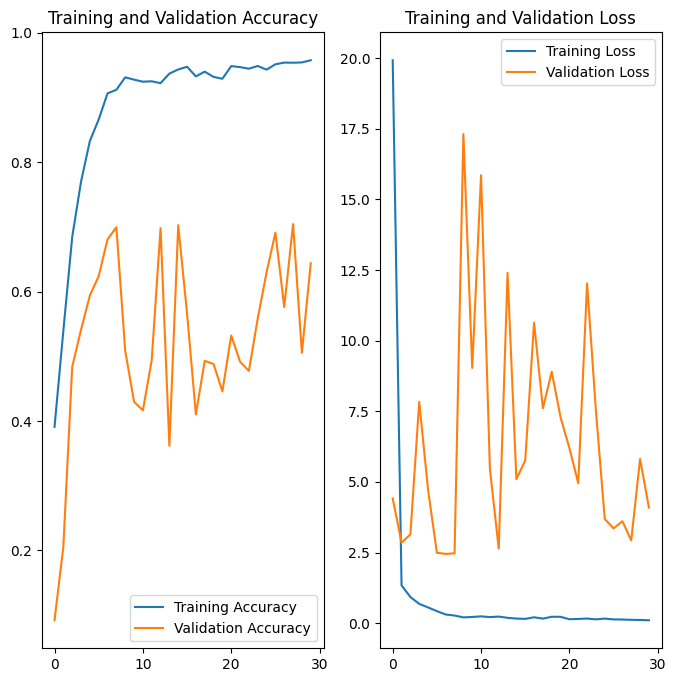

In [116]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [117]:
## your code goes here
'''input_dim = (img_width, img_height, 3)
inp = layers.Input(input_dim)
inp = layers.experimental.preprocessing.Rescaling(1.0/255, 0)(inp)
x = tf.keras.layers.Dropout(0.2)
x=tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None), bias_initializer='zeros')(inp)
x = tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Dropout(0.2)
x=tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None), bias_initializer='zeros')(x)
x = tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Dropout(0.2)
x=tf.keras.layers.Flatten()(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)
out = tf.keras.layers.Dense(9, activation='softmax', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None), bias_initializer='zeros')(x)
model = keras.Model(inp, out)'''
model4 = keras.Sequential(
    [
        keras.Input(shape=(img_width, img_height, 3)),
        layers.Rescaling(1.0 / 255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.BatchNormalization(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(9, activation="softmax"),
    ]
)

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [118]:
## your code goes here
model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model4.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 batch_normalization_16 (Bat  (None, 178, 178, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 batch_normalization_17 (Bat  (None, 87, 87, 64)     

#### **Todo:**  Train your model

In [119]:
epochs = 30
## Your code goes here, use 50 epochs.
history = history = history = model4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)  ## your model fit code

Epoch 1/30
281/281 [==============================] - 560s 2s/step - loss: 20.2593 - accuracy: 0.4315 - val_loss: 4.9493 - val_accuracy: 0.1704
Epoch 2/30
281/281 [==============================] - 532s 2s/step - loss: 1.1292 - accuracy: 0.6499 - val_loss: 2.8623 - val_accuracy: 0.2252
Epoch 3/30
281/281 [==============================] - 551s 2s/step - loss: 0.6297 - accuracy: 0.8003 - val_loss: 1.5891 - val_accuracy: 0.6689
Epoch 4/30
281/281 [==============================] - 526s 2s/step - loss: 0.4536 - accuracy: 0.8551 - val_loss: 2.1677 - val_accuracy: 0.7081
Epoch 5/30
281/281 [==============================] - 533s 2s/step - loss: 0.3299 - accuracy: 0.8897 - val_loss: 2.4620 - val_accuracy: 0.6449
Epoch 6/30
281/281 [==============================] - 532s 2s/step - loss: 0.3446 - accuracy: 0.8915 - val_loss: 13.8473 - val_accuracy: 0.3609
Epoch 7/30
281/281 [==============================] - 535s 2s/step - loss: 0.3178 - accuracy: 0.8967 - val_loss: 13.8007 - val_accuracy: 0.5

#### **Todo:**  Visualize the model results

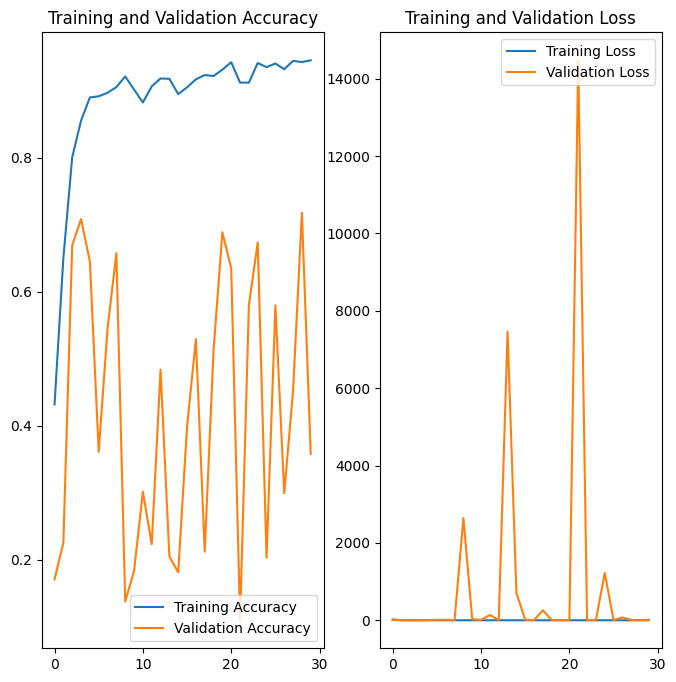

In [120]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [133]:
## your code goes here
'''input_dim = (img_width, img_height, 3)
inp = layers.Input(input_dim)
inp = layers.experimental.preprocessing.Rescaling(1.0/255, 0)(inp)
x = tf.keras.layers.Dropout(0.2)
x=tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None), bias_initializer='zeros')(inp)
x = tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Dropout(0.2)
x=tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None), bias_initializer='zeros')(x)
x = tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Dropout(0.2)
x=tf.keras.layers.Flatten()(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)
out = tf.keras.layers.Dense(9, activation='softmax', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None), bias_initializer='zeros')(x)
model = keras.Model(inp, out)'''
model_path='saved_model5'
callbacks = [
    ModelCheckpoint(model_path,
        monitor='val_acc', 
        save_best_only=True, 
        mode='max',
        verbose=0)
]
model5 = keras.Sequential(
    [
        keras.Input(shape=(img_width, img_height, 3)),
        layers.Rescaling(1.0 / 255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.BatchNormalization(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(9, activation="softmax"),
    ]
)

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [134]:
## your code goes here
model5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model5.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 batch_normalization_26 (Bat  (None, 178, 178, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 batch_normalization_27 (Bat  (None, 87, 87, 64)     

#### **Todo:**  Train your model

In [135]:
epochs = 30
## Your code goes here, use 50 epochs.
history = history = history = model5.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  shuffle=True,
  callbacks=callbacks
)  ## your model fit code

Epoch 1/30
281/281 [==============================] - 450s 2s/step - loss: 28.3318 - accuracy: 0.2824 - val_loss: 4.4654 - val_accuracy: 0.1326
Epoch 2/30
281/281 [==============================] - 464s 2s/step - loss: 1.8490 - accuracy: 0.2983 - val_loss: 2.6851 - val_accuracy: 0.1673
Epoch 3/30
281/281 [==============================] - 387s 1s/step - loss: 1.6917 - accuracy: 0.3472 - val_loss: 2.7365 - val_accuracy: 0.2323
Epoch 4/30
281/281 [==============================] - 369s 1s/step - loss: 1.5598 - accuracy: 0.3977 - val_loss: 4.6643 - val_accuracy: 0.4250
Epoch 5/30
281/281 [==============================] - 394s 1s/step - loss: 1.4500 - accuracy: 0.4322 - val_loss: 2.5942 - val_accuracy: 0.4571
Epoch 6/30
281/281 [==============================] - 378s 1s/step - loss: 1.3517 - accuracy: 0.4746 - val_loss: 4.4133 - val_accuracy: 0.2537
Epoch 7/30
281/281 [==============================] - 363s 1s/step - loss: 1.2755 - accuracy: 0.5067 - val_loss: 3.1695 - val_accuracy: 0.442

Epoch 28/30
281/281 [==============================] - 374s 1s/step - loss: 0.4811 - accuracy: 0.8194 - val_loss: 5.1668 - val_accuracy: 0.4753
Epoch 29/30
281/281 [==============================] - 362s 1s/step - loss: 0.5060 - accuracy: 0.8188 - val_loss: 5.4987 - val_accuracy: 0.4971
Epoch 30/30
281/281 [==============================] - 384s 1s/step - loss: 0.4563 - accuracy: 0.8340 - val_loss: 2.6040 - val_accuracy: 0.5830


#### **Todo:**  Visualize the model results

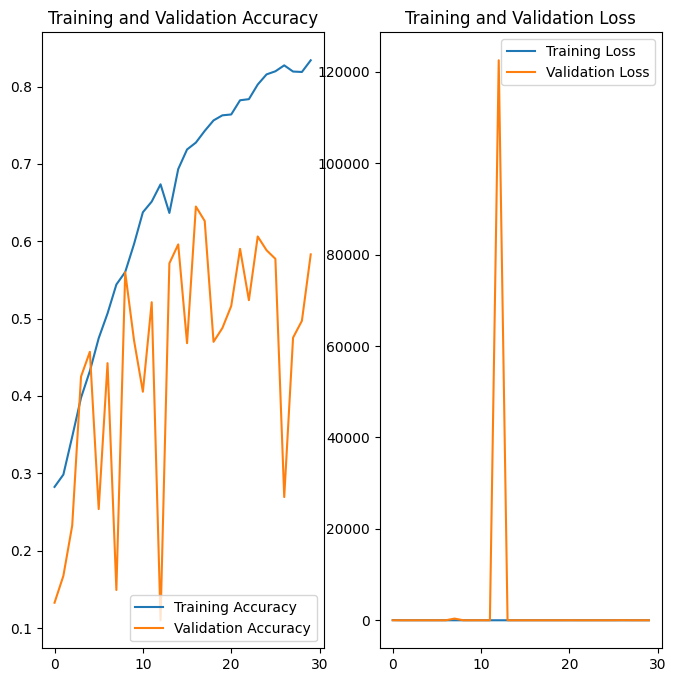

In [136]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [137]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization#, regularizations
from keras.layers.noise import GaussianNoise
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
model_path='saved_model6'
callbacks = [
    ModelCheckpoint(model_path,
        monitor='val_acc', 
        save_best_only=True, 
        mode='max',
        verbose=0)
]
droprate=0.4
input_shape = (180,180,3)
model6 = Sequential()
model6.add(layers.Rescaling(1.0 / 255,input_shape=(180,180,3)))
#model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3))) 
#convolution 1st layer
model6.add(Conv2D(64, kernel_size=(3, 3), padding="same",
                 activation='relu'))#, input_shape=input_shape)) #0
model6.add(BatchNormalization())
model6.add(Dropout(droprate))#3
#model.add(MaxPooling2D())

#convolution 2nd layer
model6.add(Conv2D(64, kernel_size=(3, 3), activation='relu',padding="same"))#1
model6.add(BatchNormalization())
model6.add(MaxPooling2D())
model6.add(Dropout(droprate))#3

#convolution 3rd layer
model6.add(Conv2D(64, kernel_size=(3, 3), activation='relu',padding="same"))#1
model6.add(BatchNormalization())
model6.add(MaxPooling2D())
model6.add(Dropout(droprate))#3

#Fully connected 1st layer
model6.add(Flatten()) #7
model6.add(Dense(500,use_bias=False)) #13
model6.add(BatchNormalization())
model6.add(Activation('relu')) #14
model6.add(Dropout(droprate))      #15

#Fully connected final layer
model6.add(Dense(9)) #8
model6.add(Activation('softmax')) #9

In [138]:
model6.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model6.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_42 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 batch_normalization_29 (Bat  (None, 180, 180, 64)     256       
 chNormalization)                                                
                                                                 
 dropout_23 (Dropout)        (None, 180, 180, 64)      0         
                                                                 
 conv2d_43 (Conv2D)          (None, 180, 180, 64)      36928     
                                                                 
 batch_normalization_30 (Bat  (None, 180, 180, 64)     256       
 chNormalization)                                    

In [139]:
epochs = 30
## Your code goes here, use 50 epochs.
history = history = history = model6.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  shuffle=True,
  callbacks=callbacks
)  ## your model fit code

Epoch 1/30
281/281 [==============================] - 1893s 7s/step - loss: 1.4842 - accuracy: 0.4702 - val_loss: 3.2835 - val_accuracy: 0.1317
Epoch 2/30
281/281 [==============================] - 1896s 7s/step - loss: 1.0330 - accuracy: 0.6201 - val_loss: 1.2385 - val_accuracy: 0.5327
Epoch 3/30
281/281 [==============================] - 1934s 7s/step - loss: 0.7679 - accuracy: 0.7251 - val_loss: 1.8082 - val_accuracy: 0.4281
Epoch 4/30
281/281 [==============================] - 1894s 7s/step - loss: 0.5370 - accuracy: 0.8098 - val_loss: 0.8786 - val_accuracy: 0.6502
Epoch 5/30
281/281 [==============================] - 1861s 7s/step - loss: 0.3967 - accuracy: 0.8599 - val_loss: 0.6430 - val_accuracy: 0.7824
Epoch 6/30
281/281 [==============================] - 1878s 7s/step - loss: 0.2949 - accuracy: 0.8991 - val_loss: 1.6048 - val_accuracy: 0.5038
Epoch 7/30
281/281 [==============================] - 1911s 7s/step - loss: 0.2363 - accuracy: 0.9144 - val_loss: 0.9707 - val_accuracy:

Epoch 28/30
281/281 [==============================] - 1989s 7s/step - loss: 0.0959 - accuracy: 0.9641 - val_loss: 1.7266 - val_accuracy: 0.6444
Epoch 29/30
281/281 [==============================] - 1924s 7s/step - loss: 0.1014 - accuracy: 0.9617 - val_loss: 1.5211 - val_accuracy: 0.5817
Epoch 30/30
281/281 [==============================] - 1852s 7s/step - loss: 0.0943 - accuracy: 0.9630 - val_loss: 0.9000 - val_accuracy: 0.7499


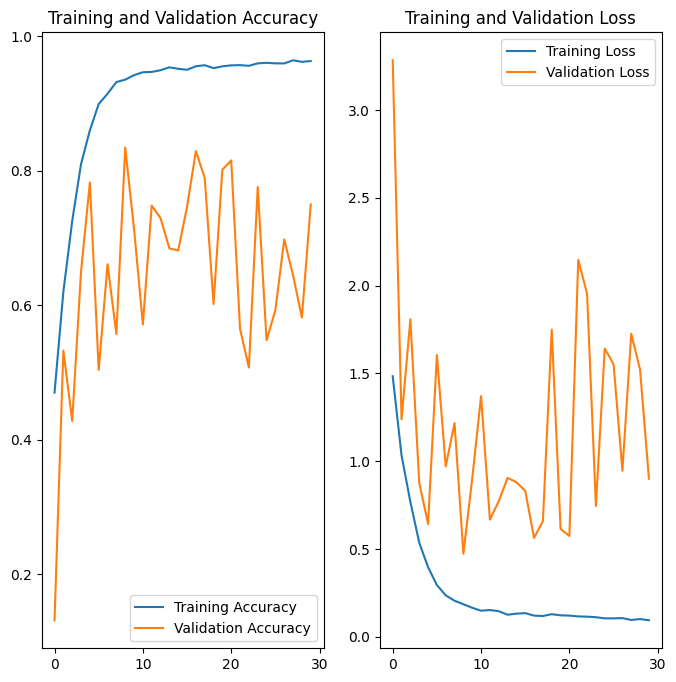

In [140]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [144]:
model_path='saved_model7'
callbacks = [
    ModelCheckpoint(model_path,
        monitor='val_accuracy', 
        save_best_only=True, 
        mode='max',
        verbose=0)
]
model7 = Sequential()

model7.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model7.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model7.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model7.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model7.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model7.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model7.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model7.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model7.add(layers.Flatten())

#Dense Layer
model7.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model7.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model7.add(layers.Dense(len(class_names),activation='softmax'))

model7.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_48 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 41, 41, 128)     

In [145]:
model7.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [146]:
epochs = 30
## Your code goes here, use 50 epochs.
history = history = history = model7.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  shuffle=True,
  callbacks=callbacks
)  ## your model fit code

Epoch 1/30
281/281 [==============================] - ETA: 0s - loss: 1.6844 - accuracy: 0.3525

INFO:tensorflow:Assets written to: saved_model7\assets


INFO:tensorflow:Assets written to: saved_model7\assets


281/281 [==============================] - 342s 1s/step - loss: 1.6844 - accuracy: 0.3525 - val_loss: 1.3974 - val_accuracy: 0.4824
Epoch 2/30
281/281 [==============================] - ETA: 0s - loss: 1.3875 - accuracy: 0.4780

INFO:tensorflow:Assets written to: saved_model7\assets


INFO:tensorflow:Assets written to: saved_model7\assets


281/281 [==============================] - 323s 1s/step - loss: 1.3875 - accuracy: 0.4780 - val_loss: 1.1766 - val_accuracy: 0.5594
Epoch 3/30
281/281 [==============================] - ETA: 0s - loss: 1.2012 - accuracy: 0.5464

INFO:tensorflow:Assets written to: saved_model7\assets


INFO:tensorflow:Assets written to: saved_model7\assets


281/281 [==============================] - 324s 1s/step - loss: 1.2012 - accuracy: 0.5464 - val_loss: 1.0136 - val_accuracy: 0.6360
Epoch 4/30
281/281 [==============================] - ETA: 0s - loss: 1.0618 - accuracy: 0.6077

INFO:tensorflow:Assets written to: saved_model7\assets


INFO:tensorflow:Assets written to: saved_model7\assets


281/281 [==============================] - 309s 1s/step - loss: 1.0618 - accuracy: 0.6077 - val_loss: 0.9831 - val_accuracy: 0.6377
Epoch 5/30
281/281 [==============================] - ETA: 0s - loss: 0.9046 - accuracy: 0.6566

INFO:tensorflow:Assets written to: saved_model7\assets


INFO:tensorflow:Assets written to: saved_model7\assets


281/281 [==============================] - 361s 1s/step - loss: 0.9046 - accuracy: 0.6566 - val_loss: 0.8034 - val_accuracy: 0.7125
Epoch 6/30
281/281 [==============================] - ETA: 0s - loss: 0.7852 - accuracy: 0.7038

INFO:tensorflow:Assets written to: saved_model7\assets


INFO:tensorflow:Assets written to: saved_model7\assets


281/281 [==============================] - 338s 1s/step - loss: 0.7852 - accuracy: 0.7038 - val_loss: 0.6767 - val_accuracy: 0.7606
Epoch 7/30
281/281 [==============================] - ETA: 0s - loss: 0.7372 - accuracy: 0.7272

INFO:tensorflow:Assets written to: saved_model7\assets


INFO:tensorflow:Assets written to: saved_model7\assets


281/281 [==============================] - 370s 1s/step - loss: 0.7372 - accuracy: 0.7272 - val_loss: 0.6436 - val_accuracy: 0.7726
Epoch 8/30
281/281 [==============================] - ETA: 0s - loss: 0.6361 - accuracy: 0.7573

INFO:tensorflow:Assets written to: saved_model7\assets


INFO:tensorflow:Assets written to: saved_model7\assets


281/281 [==============================] - 373s 1s/step - loss: 0.6361 - accuracy: 0.7573 - val_loss: 0.5599 - val_accuracy: 0.7957
Epoch 9/30
281/281 [==============================] - ETA: 0s - loss: 0.5494 - accuracy: 0.7973

INFO:tensorflow:Assets written to: saved_model7\assets


INFO:tensorflow:Assets written to: saved_model7\assets


281/281 [==============================] - 366s 1s/step - loss: 0.5494 - accuracy: 0.7973 - val_loss: 0.5664 - val_accuracy: 0.7980
Epoch 10/30
281/281 [==============================] - ETA: 0s - loss: 0.5084 - accuracy: 0.8071

INFO:tensorflow:Assets written to: saved_model7\assets


INFO:tensorflow:Assets written to: saved_model7\assets


281/281 [==============================] - 373s 1s/step - loss: 0.5084 - accuracy: 0.8071 - val_loss: 0.5433 - val_accuracy: 0.8109
Epoch 11/30
281/281 [==============================] - ETA: 0s - loss: 0.4765 - accuracy: 0.8231

INFO:tensorflow:Assets written to: saved_model7\assets


INFO:tensorflow:Assets written to: saved_model7\assets


281/281 [==============================] - 369s 1s/step - loss: 0.4765 - accuracy: 0.8231 - val_loss: 0.4536 - val_accuracy: 0.8429
Epoch 12/30
281/281 [==============================] - 395s 1s/step - loss: 0.4328 - accuracy: 0.8352 - val_loss: 0.5023 - val_accuracy: 0.8385
Epoch 13/30
281/281 [==============================] - 387s 1s/step - loss: 0.3964 - accuracy: 0.8466 - val_loss: 0.5573 - val_accuracy: 0.8162
Epoch 14/30
281/281 [==============================] - ETA: 0s - loss: 0.3704 - accuracy: 0.8592

INFO:tensorflow:Assets written to: saved_model7\assets


INFO:tensorflow:Assets written to: saved_model7\assets


281/281 [==============================] - 379s 1s/step - loss: 0.3704 - accuracy: 0.8592 - val_loss: 0.3880 - val_accuracy: 0.8821
Epoch 15/30
281/281 [==============================] - 351s 1s/step - loss: 0.3685 - accuracy: 0.8584 - val_loss: 0.4771 - val_accuracy: 0.8407
Epoch 16/30
281/281 [==============================] - ETA: 0s - loss: 0.3648 - accuracy: 0.8591

INFO:tensorflow:Assets written to: saved_model7\assets


INFO:tensorflow:Assets written to: saved_model7\assets


281/281 [==============================] - 326s 1s/step - loss: 0.3648 - accuracy: 0.8591 - val_loss: 0.3502 - val_accuracy: 0.8919
Epoch 17/30
281/281 [==============================] - 370s 1s/step - loss: 0.3301 - accuracy: 0.8761 - val_loss: 0.4320 - val_accuracy: 0.8567
Epoch 18/30
281/281 [==============================] - 360s 1s/step - loss: 0.2918 - accuracy: 0.8922 - val_loss: 0.3806 - val_accuracy: 0.8794
Epoch 19/30
281/281 [==============================] - 301s 1s/step - loss: 0.3122 - accuracy: 0.8856 - val_loss: 0.3691 - val_accuracy: 0.8843
Epoch 20/30
281/281 [==============================] - 319s 1s/step - loss: 0.2994 - accuracy: 0.8893 - val_loss: 0.4391 - val_accuracy: 0.8692
Epoch 21/30
281/281 [==============================] - 341s 1s/step - loss: 0.2963 - accuracy: 0.8918 - val_loss: 0.3535 - val_accuracy: 0.8896
Epoch 22/30
281/281 [==============================] - 354s 1s/step - loss: 0.2527 - accuracy: 0.9038 - val_loss: 0.4337 - val_accuracy: 0.8758
Epoc

INFO:tensorflow:Assets written to: saved_model7\assets


INFO:tensorflow:Assets written to: saved_model7\assets


281/281 [==============================] - 403s 1s/step - loss: 0.2472 - accuracy: 0.9040 - val_loss: 0.3389 - val_accuracy: 0.8963
Epoch 25/30
281/281 [==============================] - 383s 1s/step - loss: 0.2455 - accuracy: 0.9062 - val_loss: 0.3706 - val_accuracy: 0.8901
Epoch 26/30
281/281 [==============================] - ETA: 0s - loss: 0.2418 - accuracy: 0.9062

INFO:tensorflow:Assets written to: saved_model7\assets


INFO:tensorflow:Assets written to: saved_model7\assets


281/281 [==============================] - 343s 1s/step - loss: 0.2418 - accuracy: 0.9062 - val_loss: 0.3442 - val_accuracy: 0.9065
Epoch 27/30
281/281 [==============================] - 323s 1s/step - loss: 0.2242 - accuracy: 0.9139 - val_loss: 0.3901 - val_accuracy: 0.8874
Epoch 28/30
281/281 [==============================] - 373s 1s/step - loss: 0.2452 - accuracy: 0.9097 - val_loss: 0.3492 - val_accuracy: 0.9030
Epoch 29/30
281/281 [==============================] - 370s 1s/step - loss: 0.2189 - accuracy: 0.9136 - val_loss: 0.3512 - val_accuracy: 0.8972
Epoch 30/30
281/281 [==============================] - 399s 1s/step - loss: 0.2681 - accuracy: 0.9041 - val_loss: 0.3365 - val_accuracy: 0.8945


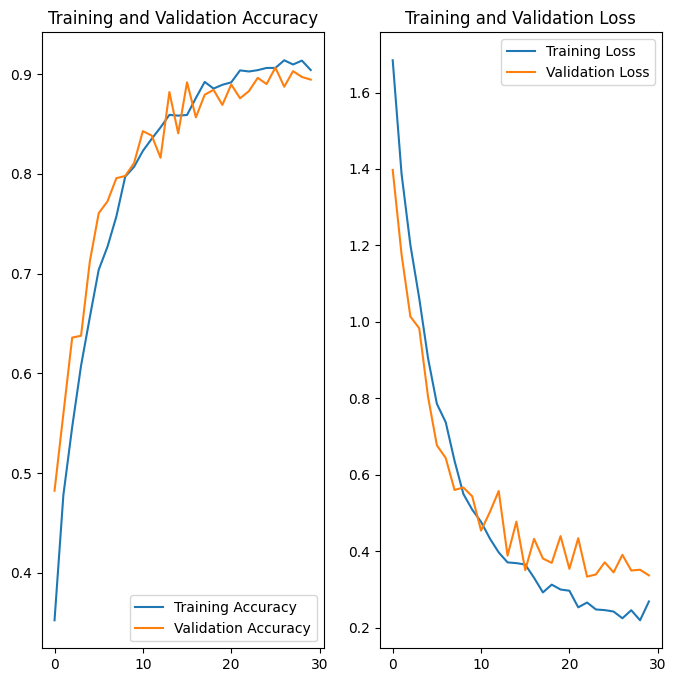

In [147]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### The data augmentation step followed by Batchnormalised model is doing very good as compared to previous models even as different dropout rates.
### Overfitting problem has been resolved with this architecture